# Swedish Auto Insurance
source: https://www.math.muni.cz/~kolacek/docs/frvs/M7222/data/AutoInsurSweden.txt

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aisudev","key":"94b743e8aaed000695c7b1cc0c261a92"}'}

## Download Dataset

In [2]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 kaggle.json
! kaggle datasets download -d redwankarimsony/auto-insurance-in-sweden

  0% 0.00/438 [00:00<?, ?B/s]
100% 438/438 [00:00<00:00, 768kB/s]


In [3]:
!unzip auto-insurance-in-sweden.zip

Archive:  auto-insurance-in-sweden.zip
  inflating: swedish_insurance.csv   


## Import Dataset

In [4]:
import pandas as pd

In [49]:
df = pd.read_csv('/content/swedish_insurance.csv')
df.rename(columns={'X':'number_of_claims', 'Y':'thousand_of_kronor'}, inplace=True)
df.head()

,number_of_claims,thousand_of_kronor
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_of_claims    63 non-null     int64  
 1   thousand_of_kronor  63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


## EDA

In [51]:
df.describe()

,number_of_claims,thousand_of_kronor
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e12976390>,
      dtype=object)

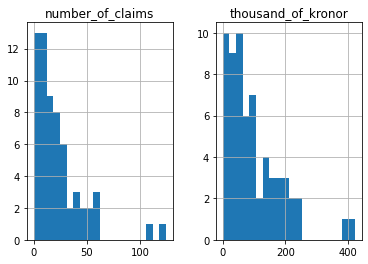

In [52]:
df.hist(bins=20)

In [53]:
import matplotlib.pyplot as plt

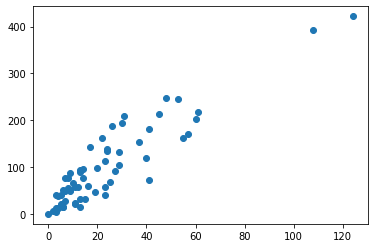

In [54]:
plt.scatter(df.number_of_claims, df.thousand_of_kronor)

## Machine Learning

In [55]:
from sklearn.model_selection import train_test_split
import numpy as np

In [68]:
x = np.array(df['number_of_claims']).reshape(-1, 1)
y = np.array(df['thousand_of_kronor'])

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, shuffle=True, random_state=42)

In [71]:
from sklearn.metrics import mean_squared_error
import math
#Evaluate
def rmse(answer, prediction):
  return math.sqrt(mean_squared_error(answer, prediction))

### Simple Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
model = LinearRegression()

In [74]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
print(model.coef_)

[3.42923429]


In [76]:
y_pred = model.predict(x_test)

### Model Score

In [77]:
model.score(x_test, y_test)

0.8950819493918402

### Root Mean Square Error

In [78]:
rmse(y_test, y_pred)

29.581132896534175

## Ploting

In [82]:
x_reg = x.reshape(-1)
x_reg = range(0, x_reg.max())
y_reg = x_reg * model.coef_

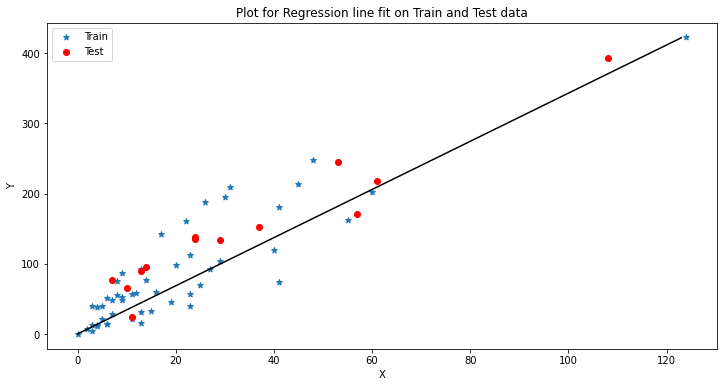

In [84]:
fig, (ax) = plt.subplots(1,1,figsize=(12,6))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Plot for Regression line fit on Train and Test data')
ax.scatter(x_train,y_train,marker='*',label='Train')
ax.scatter(x_test,y_test,c='red',label='Test')
ax.legend()
ax.plot(x_reg,y_reg,c='black')